# PROYECTO FINAL

ALUMNO: LUIS DAVILA MARTINEZ

COMISIÓN: 61675

CURSO: Data Science I: Fundamentos para la Ciencia de Datos


##PRE ENTREGA

###INFORMACION Y  DETALLE DEL DATASET

Este proyecto utilizará un dataset con las características de las canciones de Spotify.

El dataset contempla 26 géneros distintos, con un aproximado de 10,000 canciones por género, con un total de 232,725 canciones.

El dataset tiene los siguientes campos (características de las canciones):

* genre - género
* artist_name - nombre del artista
* track_name - canción
* track_id - id de canción
* popularity - popularidad
* acousticness - si es acustica (%)
* danceability - si es bailable (%)
* duration_ms - duración en milisegundos
* energy - energía
* instrumentalness - instrumental (sin voces)
* key - tonalidad (-1 -> 11; -1: sin tonalidad detectada; 0 -> 11: C, C#, D, D#, E, F,...)
* liveness - si es grabación en vivo (%)
* loudness - decibeles (dB)
* mode - modo (mayor, menor)
* speechiness - si tiene voces (%)
* tempo - beats por minuto (BPM)
* time_signature - métrica (2/4, 4/4,...)
* valence - sentimiento (triste, depresiva < 0.5; enérgica, alegre > 0.5)

Se usarán las librerías de MatPlotLib y Seaborn para los gráficos de este primer entregable.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

### OBJETIVO

Descubrir que carácterísticas son relevantes en las canciones y como son afectadas, según el género.

### HIPOTESIS


1. Las canciones que poseen alguna varibale con resultado anómalo a la tendencia de su género, tendrá como resultado una mayor popularidad.

Considerando que cada género es un molde predeterminado para la composición de canciones.
El uso de características fuera de lo común, mantienen un grado de interés mayor en el publico que las que se mantienen en lo común.

2. La popularidad de los géneros se debe a una convinación de variables que fomentan el baile.


Según la producción musical, el baile se forma desde un ritmo repetitivo y pegajoso para el oyente. Se puede apoyar del canto y de la sensación emocional que contagia la canción.


El género a analizar es:
* Pop - Música con melodías imborrables e invitaciones al baile a través de ritmos contagiosos.

### IMPORTACIÓN Y NORMALIZACIÓN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/CoderHouse/Data_Science_1/Proyecto_Final/SpotifyFeatures.csv')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

Mounted at /content/drive


En la columna "Genre" hay un género que por un símbolo se separa en 2 un solo género ("Children's Music" y "Children´s Music"). Se normalizará para normalizar el dataset.

In [ ]:
df['genre'] = df['genre'].replace("Children’s Music", "Children's Music")

In [ ]:
unique_genres = df['genre'].unique()
print(unique_genres)

['Movie' 'R&B' 'A Capella' 'Alternative' 'Country' 'Dance' 'Electronic'
 'Anime' 'Folk' 'Blues' 'Opera' 'Hip-Hop' "Children's Music" 'Rap' 'Indie'
 'Classical' 'Pop' 'Reggae' 'Reggaeton' 'Jazz' 'Rock' 'Ska' 'Comedy'
 'Soul' 'Soundtrack' 'World']


### GRAFICOS Y ANALISIS

#### MATPLOTLIB

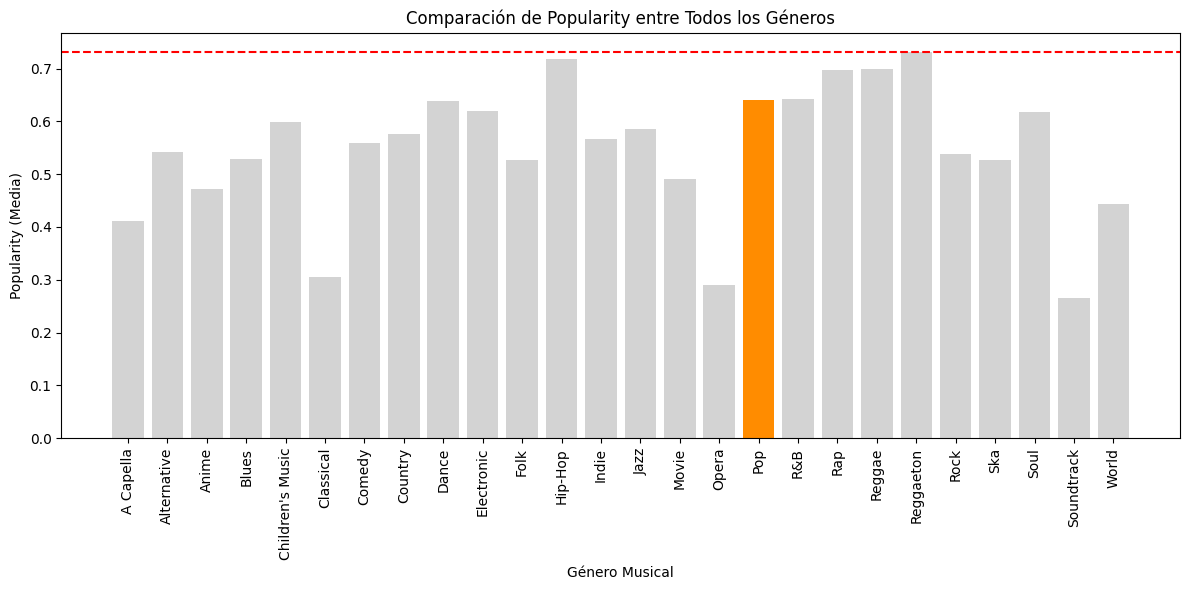

In [ ]:
# calculo de la media de 'danceability' para cada género
mean_popularity = df.groupby('genre')['popularity'].mean()
mean_danceability = df.groupby('genre')['danceability'].mean()

# gráfica de barras
genres = mean_popularity.index
popularity_values = mean_popularity.values
danceability_values = mean_danceability.values


plt.figure(figsize=(12, 6))
colors = ['lightgray'] * len(genres)
colors[genres.get_loc('Pop')] = 'darkorange'
plt.bar(genres, danceability_values, color=colors)
plt.title('Comparación de Popularity entre Todos los Géneros')
plt.xlabel('Género Musical')
plt.ylabel('Popularity (Media)')
plt.xticks(rotation=90)
plt.tight_layout()

pop_max_danceability = mean_danceability['Reggaeton']
plt.axhline(y=pop_max_danceability, color='red', linestyle='--')

plt.show()


Se observa que el 'Pop' es de los géneros con mayor popularidad entre los usuarios de la plataforma.

Las características que debén de tener las canciones para tener una popularidad alta son:

* Danceability - Que tan bailable es
* Energy - Energía que transmite
* Liveness - Si la grabación es en vivo
* Speechiness - Que tanta voz suena en la canción
* Valence - Sensación transmitida (alegre / triste)


Los siguientes gráficos nos mostrarán su desempeño en las diferentes variables que la plataforma considera que apoyan a la popularidad de las canciones del género.

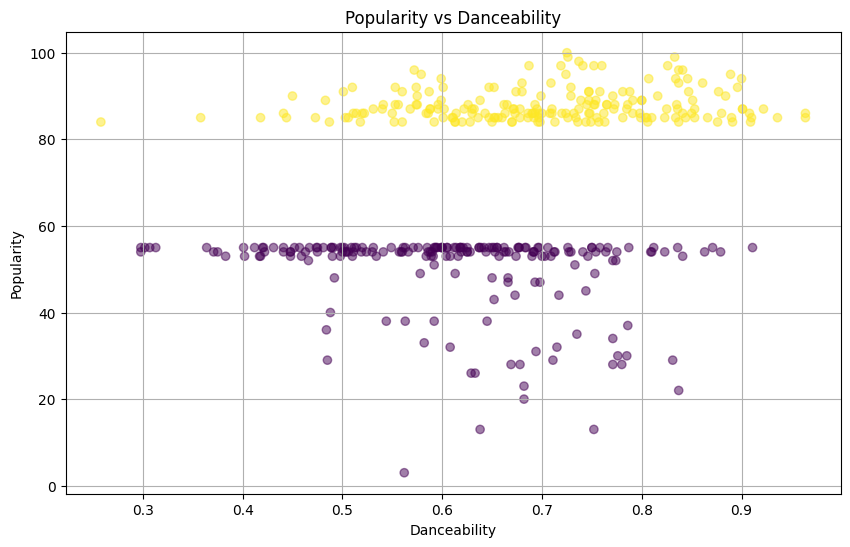

In [ ]:
pop_df = df[df['genre'] == 'Pop']
#pop_df.head()

#órden por popularidad y selección de las canciones con mayor y menor popularidad
top_200 = pop_df.sort_values(by=['popularity'],ascending=False).head(200)
bottom_200 = pop_df.sort_values(by=['popularity']).head(200)

#combinación de dataframes
selected_songs = pd.concat([top_200, bottom_200])

#calculo del umbral de popularidad (media de las canciones seleccionadas)
popularity_threshold = selected_songs['popularity'].mean()

#columna 'is_anomaly' para las canciones seleccionadas
selected_songs['is_anomaly'] = np.where(selected_songs['popularity'] > popularity_threshold, True, False)

#creación de scatter plot
plt.figure(figsize=(10,6))
plt.scatter(selected_songs['danceability'], selected_songs['popularity'], c=selected_songs ['is_anomaly'], cmap='viridis', alpha=0.5)
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.title('Popularity vs Danceability')
plt.grid(True)
#plt.colorbar()
plt.show()


Se observa una brecha que muestra en qué punto inician las anomalías en las canciones del género. Además de una inclinación en "danceability" en las canciones con mayor popularidad.

Otro punto a tener en cuenta es que hay canciones que rompen la tenedencia de "danceability". Esto se puede dar por la energía y/o "valencia de las canciones:
* Las canciones con menor popularidad tienen una invitación al baile considerable, pero que le faltan ajustar algunas características para lograr tener un mayor "danceability".
Esto nos indica que la canción no tuvo los resultados esperados en el mercado al no cubrir con las características del género para ser "pegajosa" (speechiness, loudness), pero que cumplen con la energía suficiente para que cuando alguien la escuche, empiece a bailar al ritmo de la canción.
* Las canciones con mayor popularidad que están cargadas a la izquierda, muestran que si cumplen con las características del género, pero que una o varias varibales son las que no permiten que sean tan bailables como las demás.
Las variables a considerar que apoyen a este resultado son "energy", "tempo" y "valence". Estas variables nos dicen si la canción tiene un impacto enérgico en el oyente. Por lo que si es una canción lenta y (con inclinación a ser) triste, la canción no incitará a bailar o a moverse.

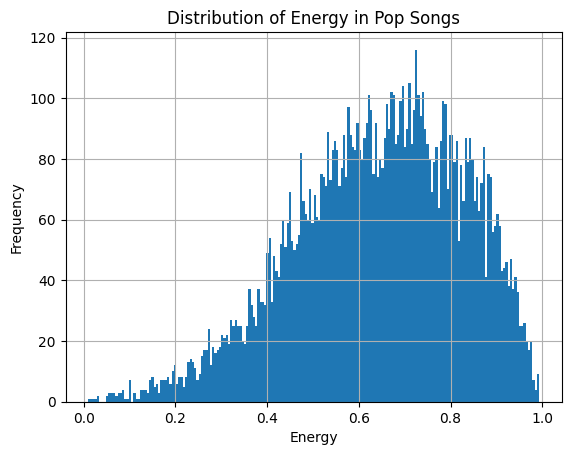

In [ ]:
pop_df = df[df['genre'] == 'Pop']

plt.hist(pop_df['energy'], bins=200)
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.title('Distribution of Energy in Pop Songs')
plt.grid(True)
plt.show()

Se observa que la energía de las canciones procura ser alta.
El género 'Pop' se caracteríza por tener una energía alta y constante, pero mantiene un contraste con canciones con menor energía para que los oyentes no sientan saturación como con otros géneros que si exigen una energía mayor (metal, reggaeton, ska, por mencionar algunos).



#### SEABORN

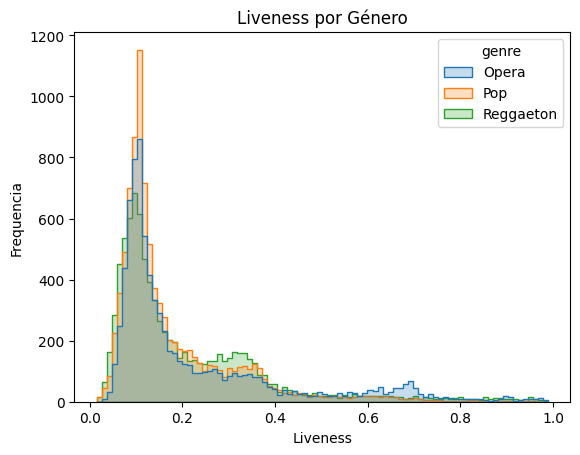

In [ ]:
genres_of_interes = ['Pop', 'Opera', 'Reggaeton']
filtered_df = df[df['genre'].isin(genres_of_interes)]

sns.histplot(data=filtered_df, x='liveness', hue='genre', element='step')
plt.title('Liveness por Género')
plt.xlabel('Liveness')
plt.ylabel('Frequencia')
plt.show()

Este análisis se centra en los géneros Pop, Reggaetón y Ópera para observar cómo el método de grabación impacta en su popularidad.

*  Pop: Este género se caracteriza por una producción en estudios de grabación, utilizando herramientas digitales para lograr un sonido "plástico". La búsqueda de una calidad constante para el mercado se ve reflejada en la elección de este método de grabación, que permite al artista mantener un estándar de calidad para el público.

*  Reggaetón: Similar al Pop, el Reggaetón se graba en estudios, pero se apoya en una mayor utilización de herramientas e instrumentos digitales para un control más preciso del sonido. El uso de autotune, beats digitales y sonidos pregrabados y sintéticos son elementos clave en la búsqueda de calidad dentro del género.

*  Ópera: En el gráfico se puede observar que el género posee un mayor número de canciones que su grabación es en vivo. A pesar de que procura una grabación en vivo, se observa que tiene una constante de grabación controlada, no necesariamente en estudio, pero sí con el uso mínimo de herramientas digitales para controlar el sonido que entra a la pista de grabación. A diferencia de los dos géneros anteriores, la Ópera se caracteriza por una producción en vivo, lo que contribuye a una popularidad mínima y constante. Aunque las grabaciones controladas en estudio pueden ofrecer una mejor calidad, las interpretaciones en vivo, incluso de la misma canción, mantienen un mayor interés en el público por la variabilidad de las interpretaciones.


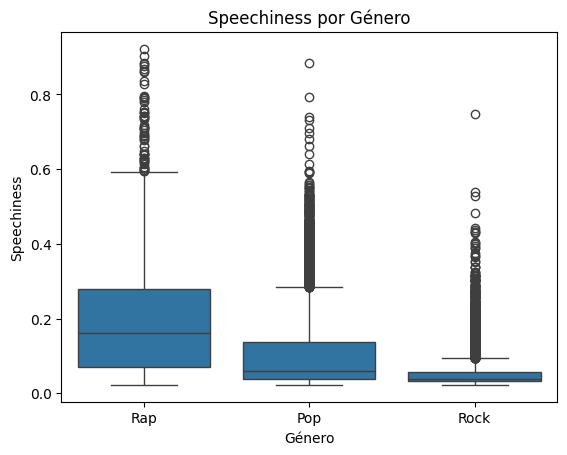

In [ ]:
genres_of_interest = ['Pop', 'Rap', 'Rock']
filtered_df = df[df['genre'].isin(genres_of_interest)]

sns.boxplot(x='genre', y='speechiness', data=filtered_df)
plt.title('Speechiness por Género')
plt.xlabel('Género')
plt.ylabel('Speechiness')
plt.show()


Se observa que cada género musical tiene su propio estilo en cuanto al uso de palabras en las canciones. Si bien tanto el Pop como el Rock tienden a usar un número relativamente bajo de palabras, el Rap se destaca por su uso abundante de letras.

El Rock, a pesar de su sonido distorsionado y saturado, comparte con el Pop una búsqueda de melodías en las frases, lo que se traduce en una cantidad similar de palabras o frases en sus canciones. Ambos géneros se enfocan en crear melodías pegadizas.

Por otro lado, el Rap, asociado a la música hip hop, se caracteriza por su estilo vocal que prioriza el uso de palabras y frases. Este género utiliza las figuras líricas para crear melodías y ritmos interesantes, lo que le permite generar un mayor impacto en el mensaje que transmite la letra.

En resumen, el Rap se destaca por su uso abundante de letras, mientras que el Pop y el Rock se enfocan en la melodía. Sin embargo, todos los géneros buscan la creatividad y la energía en sus letras, especialmente en el ámbito mercadológico.


<ipython-input-9-ba3473cbc81f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_df['valence_section'] = pd.cut(pop_df['valence'], bins=valence_bins, labels=valence_labels)


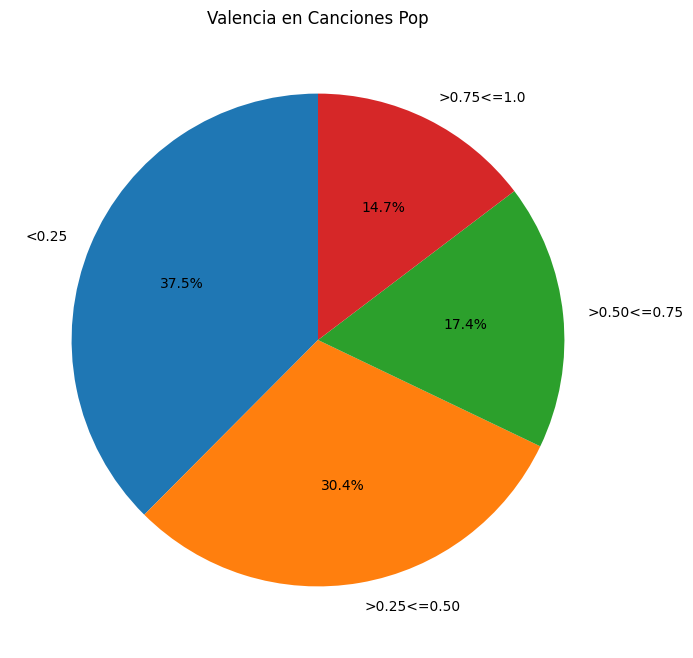

In [ ]:
pop_df = df[df['genre'] == 'Pop']

valence_bins = [0, 0.25, 0.50, 0.75, 1.0]
valence_labels = ['<0.25', '>0.25<=0.50', '>0.50<=0.75', '>0.75<=1.0']
pop_df['valence_section'] = pd.cut(pop_df['valence'], bins=valence_bins, labels=valence_labels)

valence_counts = pop_df['valence_section'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(valence_counts, labels=valence_labels, autopct='%1.1f%%', startangle=90)
plt.title('Valencia en Canciones Pop')
plt.show()


El Pop se caracteriza por su capacidad para conectar con los oyentes a través de las expresiones emocionales.

El gráfico muestra una tendencia en el género hacia una sensación musical entre 0.00 y 0.50. Esto sugiere que las canciones de Pop que predominan son aquellas con una sensación melancólica o lenta.

La sección verde del gráfico representa las canciones que se alejan de esta tendencia. Sin embargo, estas canciones no lograron alcanzar la energía necesaria para establecerse en los extremos que caracterizan al género.

En otras palabras, el gráfico sugiere que el Pop se inclina hacia las emociones más suaves y melancólicas, aunque existen algunas canciones que exploran otros matices emocionales.


### CONCLUSION


1. Las anomalías no son pilares para una mayor popularidad.

Los gráficos nos muestran canciones que llegan a tener anomalías según su género, pero esta característica no necesariamente las convierte o mantiene con popularidad alta.
Lo que si es bueno a tener en consideración es a la hora de componer nuevas canciones, pues estas anomalías aportan posibles resultados a esperar si se llegan a usar en la producción musical.  

2. Los géneros con mayor popularidad si tienen resultados mayores en la combinación de varibales que estimulan una sensación de eufória en el oyente.

Las varibales relevantes son: Danceability, Energy, Tempo, y Valence.

Los géneros que cumplen con estas variables son: Reggaeton, Hip-hop, Rap, Reggae, Pop, R&B, y Dance.

##PROYECTO FINAL

## OBJETIVOS  

1. Elegir un método de feature selection para reducir la dimensionalidad del dataset.
2. Elegir un algoritmo de regresión o clasificación para entrenar con los datos elegidos.
3. Cálculo de métricas básicas para validar el modelo.
4. Generar conclusiones con base en los resultados obtenidos.

##CONTEXTOS

###CONTEXTO ANALÍTICO

Para esta entrega se usará un aprendizaje supervisado (Regresión Lineal).

Las varibales a utilizar serán:
- Popularity -> Target
- Danceability -> Feature
- Energy -> Feature
- Tempo -> Feature
- Valence -> Feature

###CONTEXTO COMERCIAL

En la industria musical, la producción de una canción se nutre de las características de otras canciones que han logrado gran éxito. Comprender las variables que impulsaron su popularidad es crucial para la creación de nuevas obras con potencial viral. Al analizar las tendencias que llevaron a una canción a la cima, los compositores pueden optimizar sus propias creaciones para aumentar su probabilidad de resonar con el público.

###PROBLEMA COMERCIAL

La industria musical está en constante evolución, con nuevas tendencias y gustos que emergen constantemente. Para los compositores y productores musicales, es crucial mantenerse al día con las preferencias del público para crear música que resuene con la audiencia actual. Sin embargo, identificar las variables que impulsan el éxito de una canción es un desafío complejo.

##IMPORTACIÓN DE DATA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/CoderHouse/Data_Science_1/Proyecto_Final/SpotifyFeatures.csv')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

Mounted at /content/drive


En la columna "Genre" hay un género que por un símbolo se separa en 2 un solo género ("Children's Music" y "Children´s Music"). Se normalizará para normalizar el dataset.

In [3]:
df['genre'] = df['genre'].replace("Children’s Music", "Children's Music")

In [4]:
unique_genres = df['genre'].unique()
print(unique_genres)

['Movie' 'R&B' 'A Capella' 'Alternative' 'Country' 'Dance' 'Electronic'
 'Anime' 'Folk' 'Blues' 'Opera' 'Hip-Hop' "Children's Music" 'Rap' 'Indie'
 'Classical' 'Pop' 'Reggae' 'Reggaeton' 'Jazz' 'Rock' 'Ska' 'Comedy'
 'Soul' 'Soundtrack' 'World']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [6]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


##REGRESIÓN LINEAL

####IMPORTACIÓN DE BIBLIOTECAS

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import random

####PREPARACIÓN DE DATOS

In [8]:
#Variables a utilizar
X = df[['danceability', 'energy', 'tempo', 'valence']]
y = df['popularity']

#Datos divididos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Escalar variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

####ENTRENAMIENTO

In [9]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

####PREDICCIONES

In [10]:
y_pred = regressor.predict(X_test)

In [11]:
y_pred

array([41.52388642, 30.29415621, 47.20151777, ..., 37.84568574,
       53.70312333, 40.48969218])

####MÉTRICAS

In [12]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")
print(f"R cuadrado (R^2): {r2}")

Error Cuadrático Medio (MSE): 291.1454180472945
Raíz del Error Cuadrático Medio (RMSE): 17.06298385533124
R cuadrado (R^2): 0.12558866015343173


####VISUALIZACIÓN

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


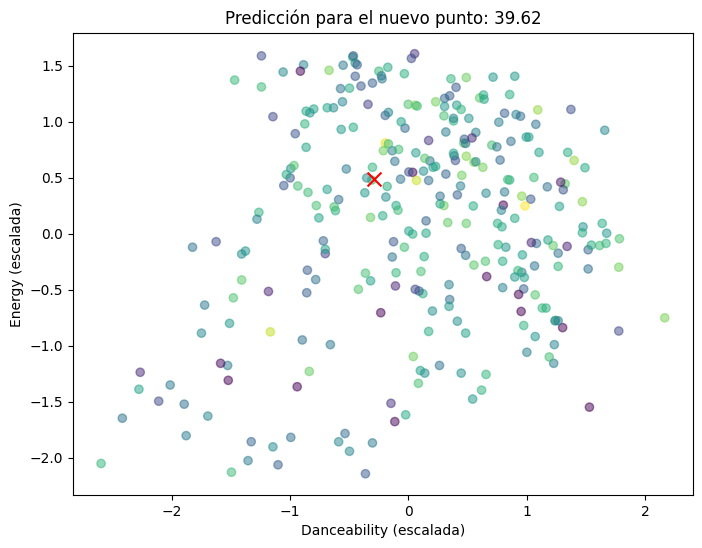

In [16]:
num_points = 300
random_indices = random.sample(range(len(X_train)), num_points)
X_train_subset = X_train[random_indices]
y_train_subset = y_train.iloc[random_indices]

#Nuevo punto para predecir
new_point = np.array([[0.5, 0.7, 120, 0.6]])
new_point_scaled = scaler.transform(new_point)

#Predicción
prediction = regressor.predict(new_point_scaled)

#Visualización de datos (danceability vs energy)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_subset[:, 0], X_train_subset[:, 1], c=y_train_subset, cmap='viridis', alpha=0.5)
plt.scatter(new_point_scaled[0, 0], new_point_scaled[0, 1], marker='x', color='red', s=100)

plt.title(f"Predicción para el nuevo punto: {prediction[0]:.2f}")
plt.xlabel("Danceability (escalada)")
plt.ylabel("Energy (escalada)")
plt.show()

##CONCLUSIÓN

El modelo de regresión lineal sí ofrece información útil para predecir características musicales que podrían ser de utilidad para compositores y productores. Sin embargo, el modelo no es perfecto y tiene margen de mejora.

Veamos los detalles:

- MSE (Error Cuadrático Medio): 291.14

Las predicciones del modelo se desvían de los valores reales. Esto significa que el modelo aún necesita mejorar para aumentar su precisión pero que se mantiene en un rango donde la desviación no es de alta importancia.

- R^2: 0.12

El modelo solo explica 12% de la variabilidad en los datos. Hay otros factores que influyen en las características musicales que el modelo no está tomando en cuenta.

Para mejorar el modelo, se sugiere:

- Revisar el cruce de los datos: Esto significa analizar cómo las diferentes variables se relacionan entre sí y cómo se complementan.

- Ajustar el modelo: Se pueden probar diferentes combinaciones de variables, ajustes de parámetros o incluso modelos más complejos para obtener mejores resultados.